# Telco Churn Exploratory Data Analysis

#### Importing Libraries

In [1]:
# Standard Analysis Tools
import pandas as pd
import numpy as np
import pickle
import sys
sys.path.insert(0, '/home/yeokoso/Documents/ml_scripts')

# Visualisation Tools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('fivethirtyeight')

# User Defined Functions
import cleaning
import visualisation

# Settings
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings('ignore')

#### Loading Dataset and Initial Checks

In [2]:
df = pd.DataFrame(pd.read_csv('./data/telco_customer_churn.csv'))

In [3]:
df.shape

(7043, 21)

In [4]:
# Checking data types
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Examining the data and their respective data types, we observe that 'TotalCharges' is the only variable with a wrong data type. Its values have been processed as strings when they should have been numerical.

In [6]:
# Amending TotalCharges data type
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [7]:
# Checking for missing data
missing_percentages = cleaning.check_missing(df)

The dataframe has 21 variables.
The dataframe has 1 variables that have missing data.


In [8]:
# Varaible with missing data
missing_percentages

TotalCharges    0.156183
dtype: float64

In [9]:
# Examining the entries with missing values 
df.loc[df.TotalCharges.isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [10]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [11]:
# Changing labels for target Churn for clearer visualisations
df.Churn = df.Churn.apply(lambda x :
                         'Churn' if x == 'Yes'
                         else 'Remain')

In [12]:
df.loc[df.tenure == 0].equals(df.loc[df.TotalCharges.isnull()]) 

True

As the entries that were missing data from the 'TotalCharges' column were new customers that have recently signed up with the Telco (tenure == 0), they would not be representative data as they may not have used the Telco services yet. Therefore, we will be dropping these rows from the dataset.

In [13]:
df = df.dropna(axis=0, how='any')

In [14]:
# Checking our missing percentages
missing_percentages = cleaning.check_missing(df)

The dataframe has 21 variables.
The dataframe has no variables that are missing values.


In [15]:
# Dropping unecessary customerID
df = df.drop('customerID', axis=1)

In [16]:
# Converting 'object' datatypes to 'categorical'
df = cleaning.convert_to_categorical(df)

## Examining Categorical Variables

In [17]:
# Checking levels for categorical variables
df.select_dtypes(include='category').nunique()

gender              2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
dtype: int64

It appears that we have a lot of variables with only two levels, therefore we can label encode them. For variables with more than 2 levels, we will create dummy variables for each level.

### Target Variable : Churn

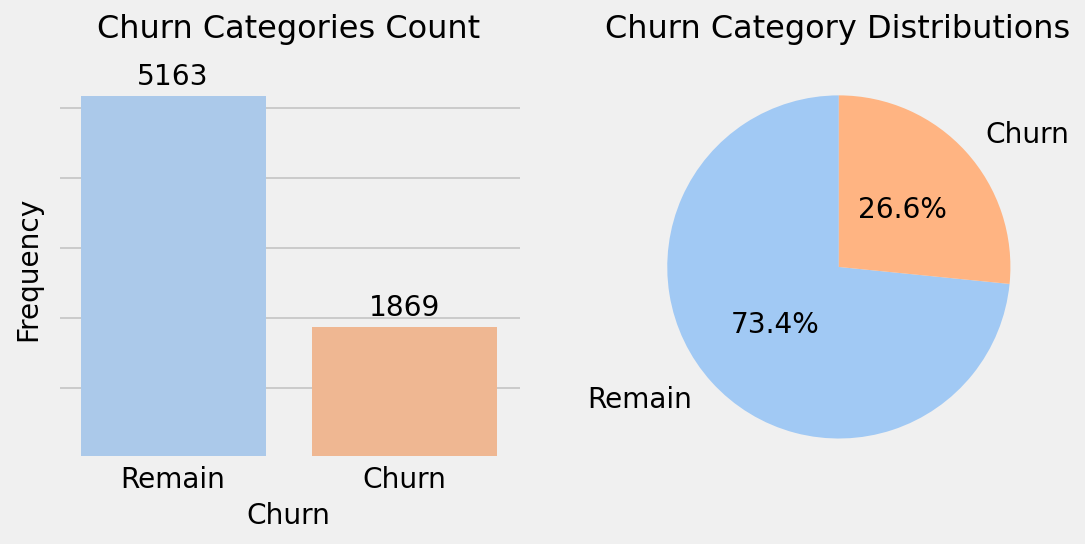

In [18]:
visualisation.count_pie_plots(df, 'Churn')

### Customer Traits Variables

#### Variable : Gender
The Telco has similar number of members from both genders and there appears to be no significant difference in the Churn Rate between genders as well.

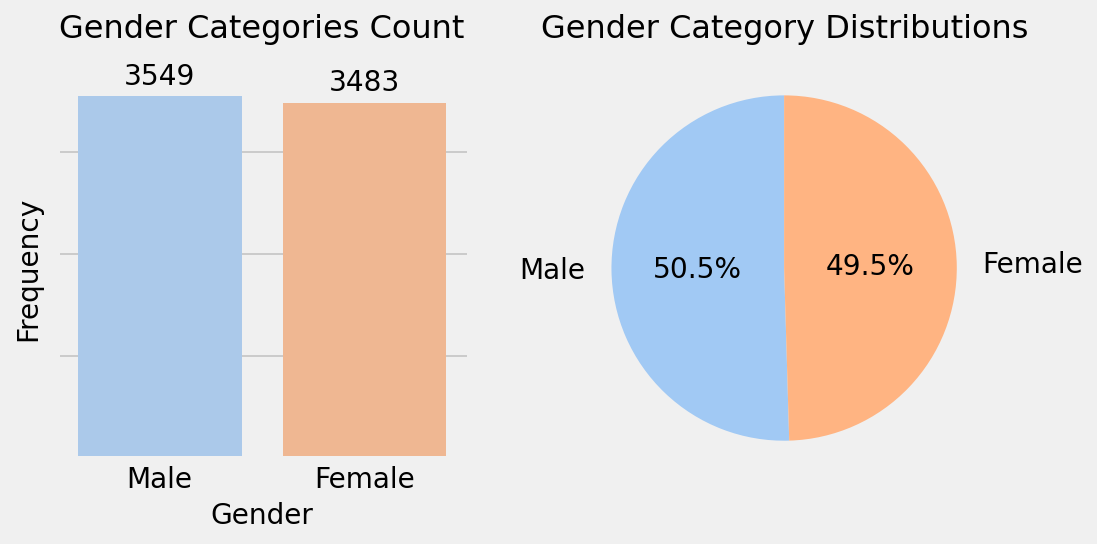

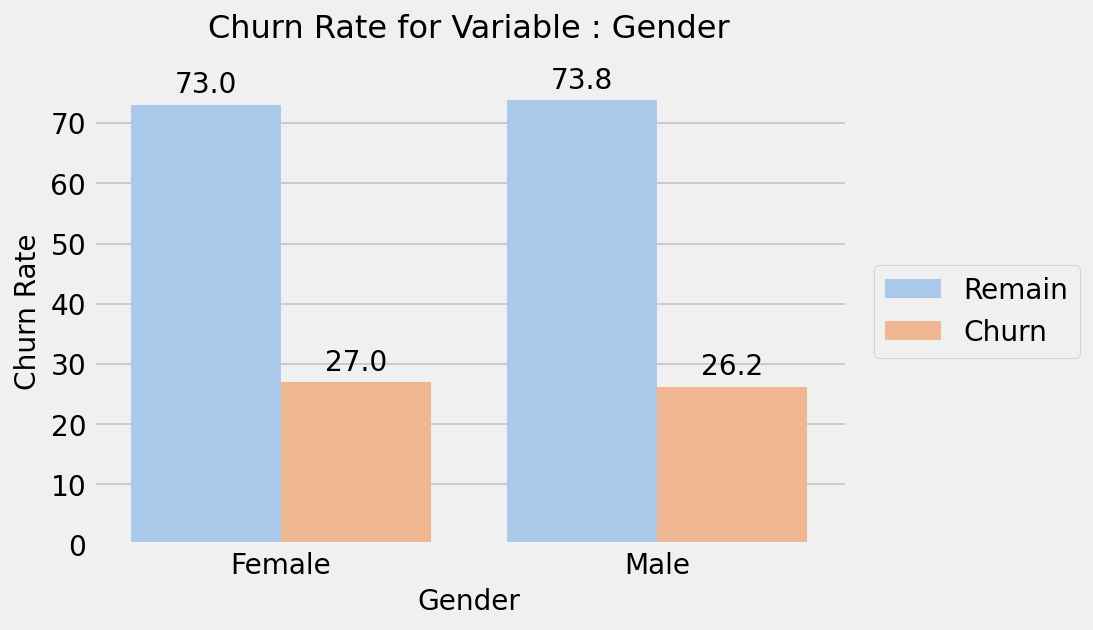

In [19]:
visualisation.count_pie_plots(df, 'gender')
visualisation.barplot_with_hue(df, 'gender', 'Churn', 'Churn Rate')

#### Variable : Partner
There is almost an equal number of customers who are single or have a partner.
However, the churn rate for customers who are single is much 13% higher than those who have partners.

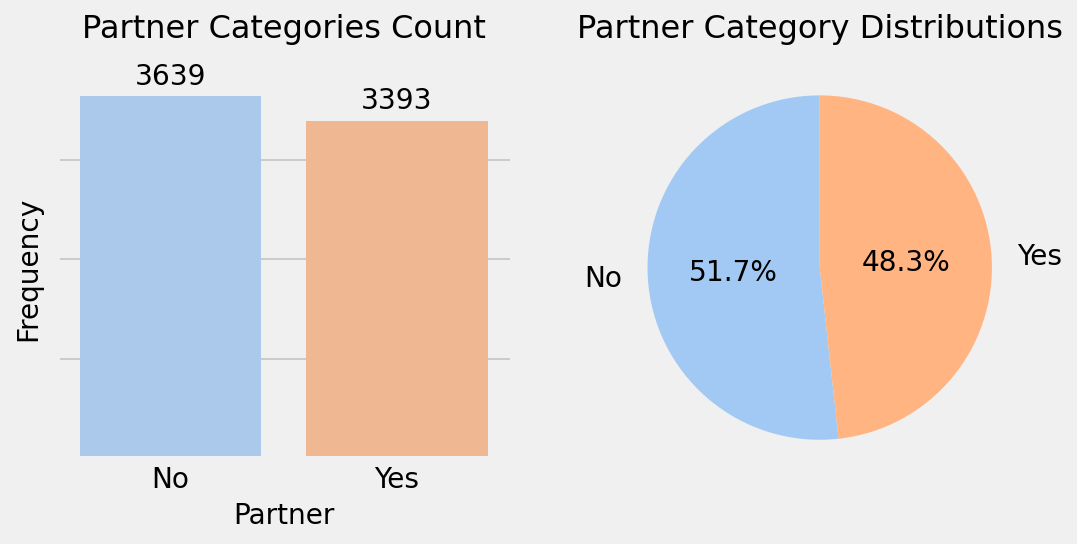

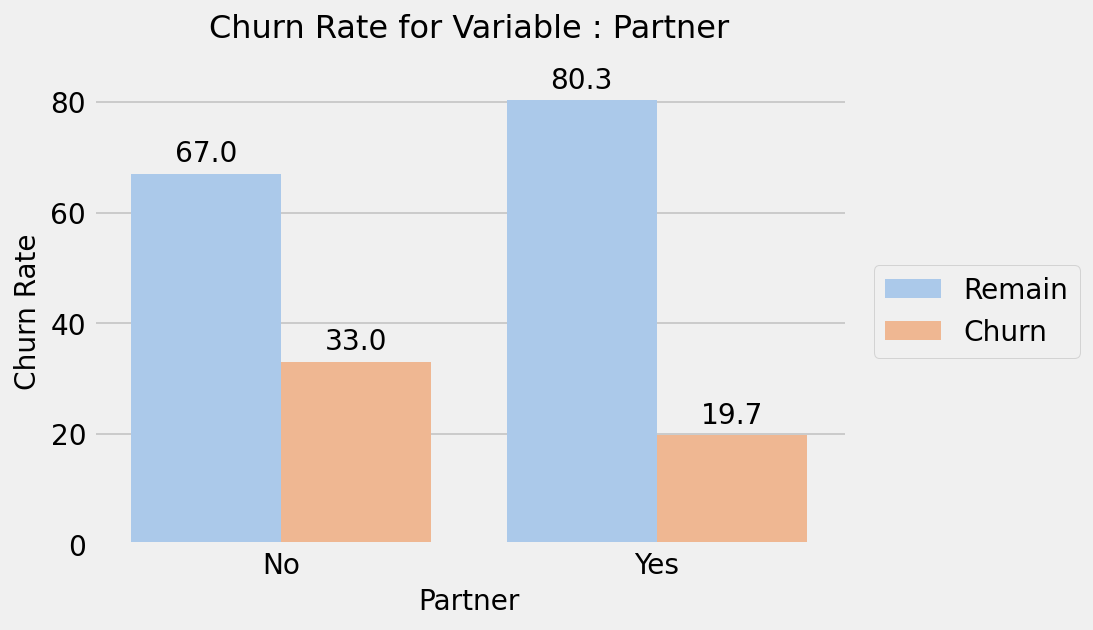

In [20]:
visualisation.count_pie_plots(df, 'Partner')
visualisation.barplot_with_hue(df, 'Partner', 'Churn', 'Churn Rate')

#### Variable : Dependents
The Telco has significantly more customers with no dependents than those who have dependents. It may be indicative that younger people are more attracted to the Telco or that they are the Telco's target audience.

However, the churn rate for customer without dependents are almost two times higher. Again, this might be due to having a larger base of younger customers, whom are more technically savvy and able to source out more competitive plans from other Telcos.

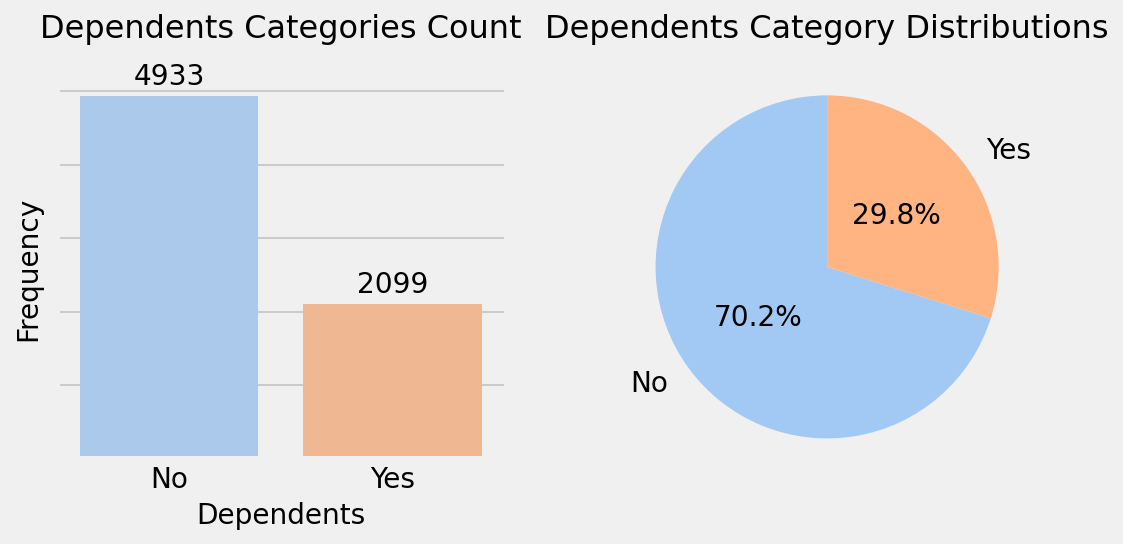

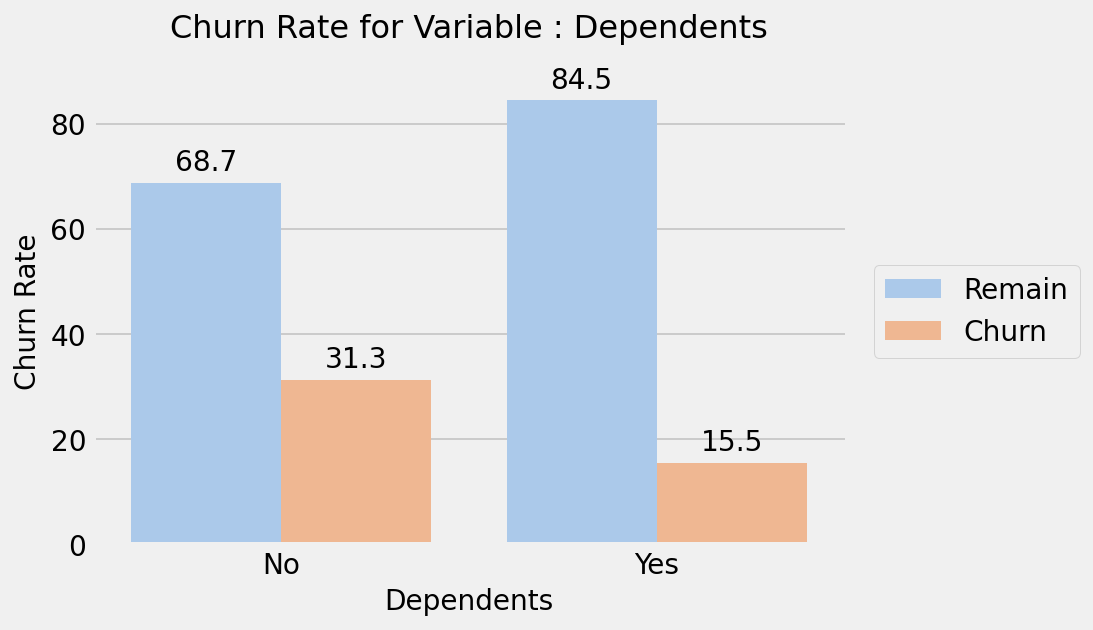

In [21]:
visualisation.count_pie_plots(df, 'Dependents')
visualisation.barplot_with_hue(df, 'Dependents', 'Churn', 'Churn Rate')

### Phone Plan Related Variables 

#### Variable : PhoneService
Most users have contracts with phone services and there is a slightly higher churn rate for customers that have phone services included.

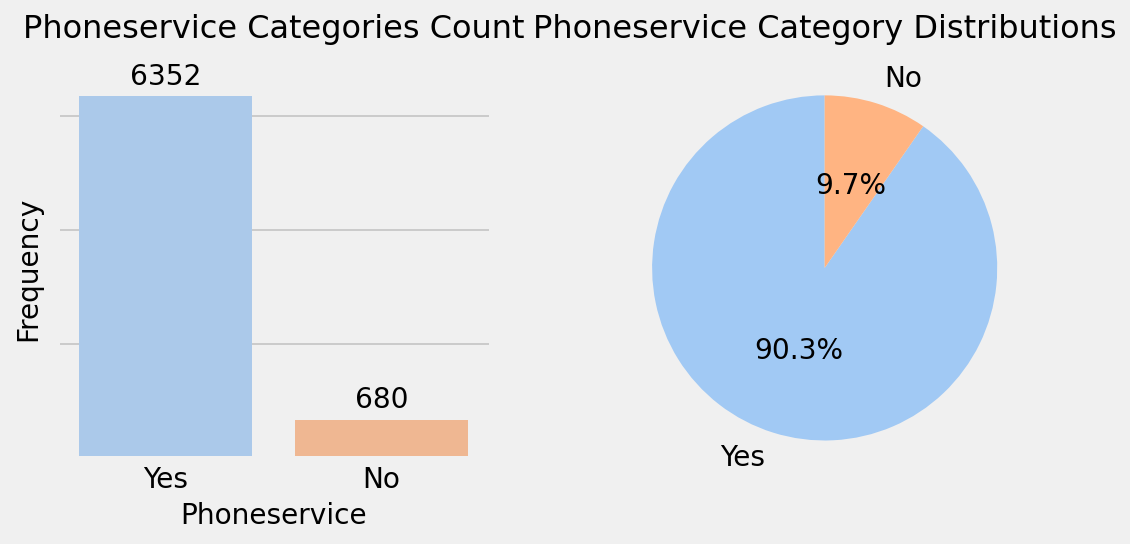

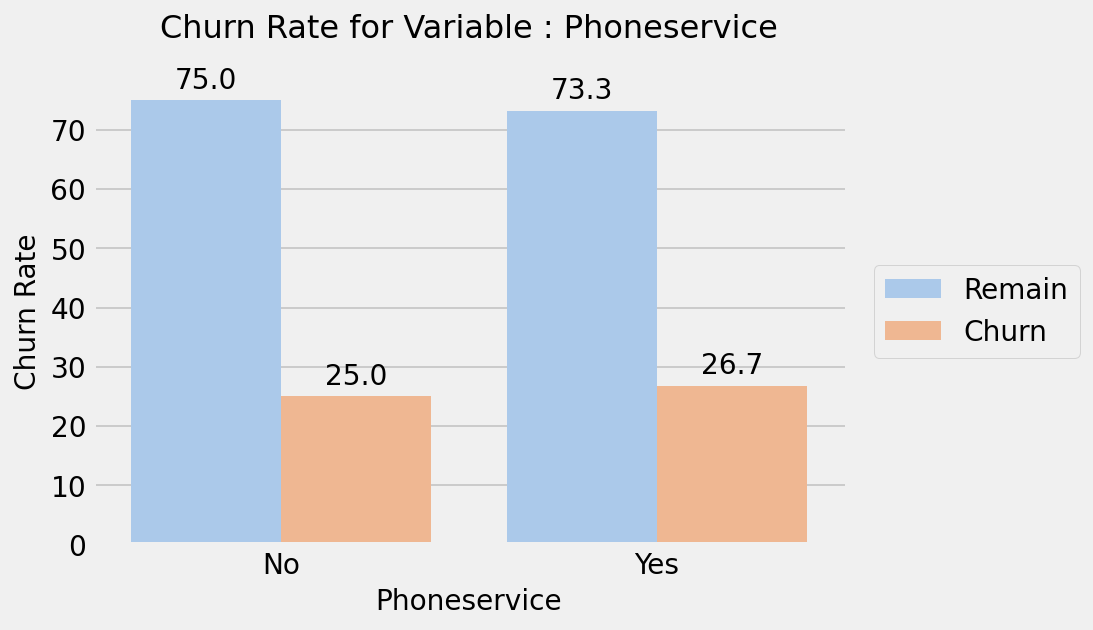

In [22]:
visualisation.count_pie_plots(df, 'PhoneService')
visualisation.barplot_with_hue(df, 'PhoneService', 'Churn', 'Churn Rate')

#### Variable : MultipleLines 
Of the customers that have phone services included, there are more customers that only have a single line.

The churn rate for customers with multiple lines is about 3.5% more than customers with single or no phone lines. 

In [23]:
df.MultipleLines.value_counts()

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

Given that a customer with no phone service will also not have multiple line, we can simplify this variable by changing grouping users with no phone service together with those that do not have multiple lines.

In [24]:
df.MultipleLines = df.MultipleLines.apply(lambda x :
                                         'No' if x == 'No phone service'
                                         else x)

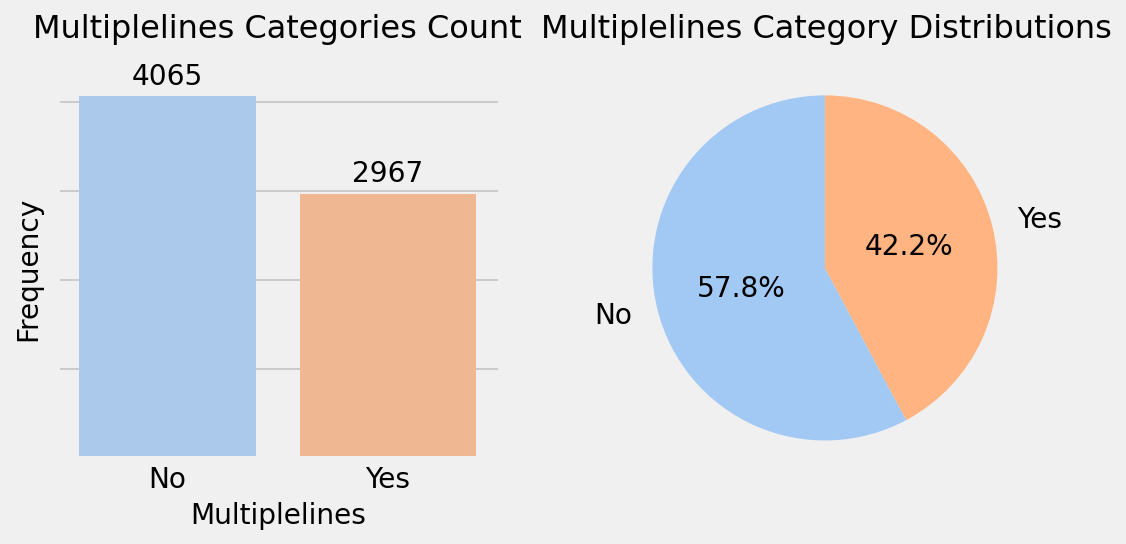

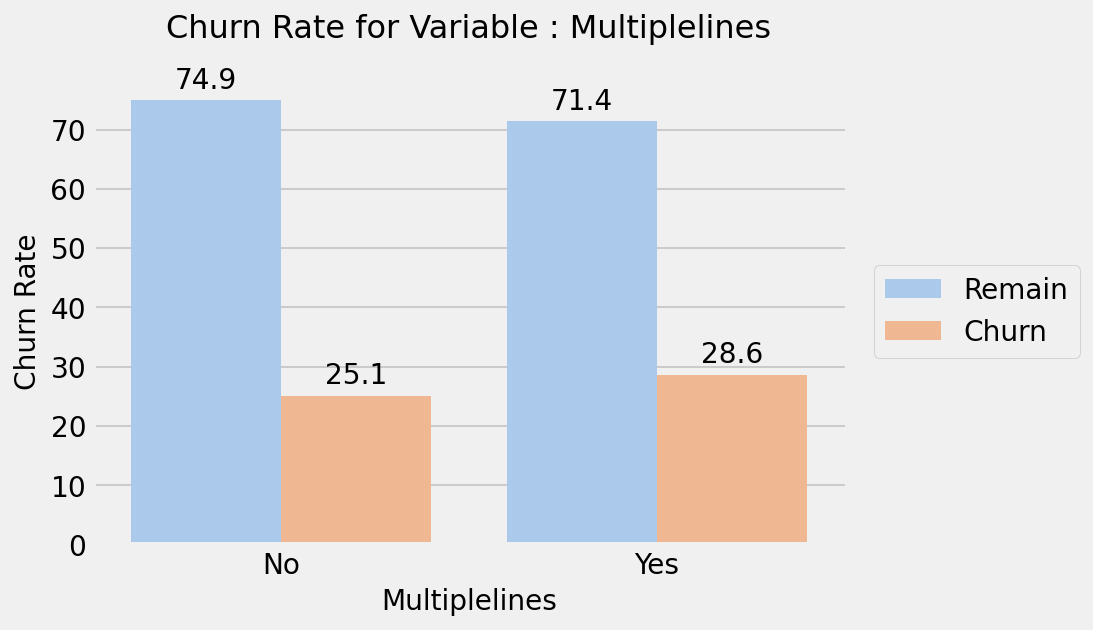

In [25]:
visualisation.count_pie_plots(df, 'MultipleLines')
visualisation.barplot_with_hue(df, 'MultipleLines', 'Churn', 'Churn Rate')

### Internet Plan Related Variables
The Telco offers add-on services for users that subscribe to an internet plan. Therefore, we will be categorising users with no internet plans as not having the service.

In [26]:
# Recategorising users with no internet plans
add_on_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies']

for var in add_on_services:
    df[var] = df[var].replace({'No internet service' : 'No'})

#### Variable : InternetService
Approximately __20%__ of customers do not have an Internet Service subscription and such customers have a __very low churn rate of only 7.4%__.

For customers that have an internet subscription, about __57%__ opt for higher and more expensive fibre optic plans. Such customers are __two times more likely to churn__ as compared to customers on DSL plans which are slower but cheaper. 

Surprisingly, the __customers who churn__ for both the fibre optic and DSL plans are actually those who are on average __paying less in monthly charges__. This may be indicative that they have selected a cheaper plan but realised that does not meet their needs. This could mean that __there may be some mistakes in the way the sales staff are advising customers__ on which plan to take up. 

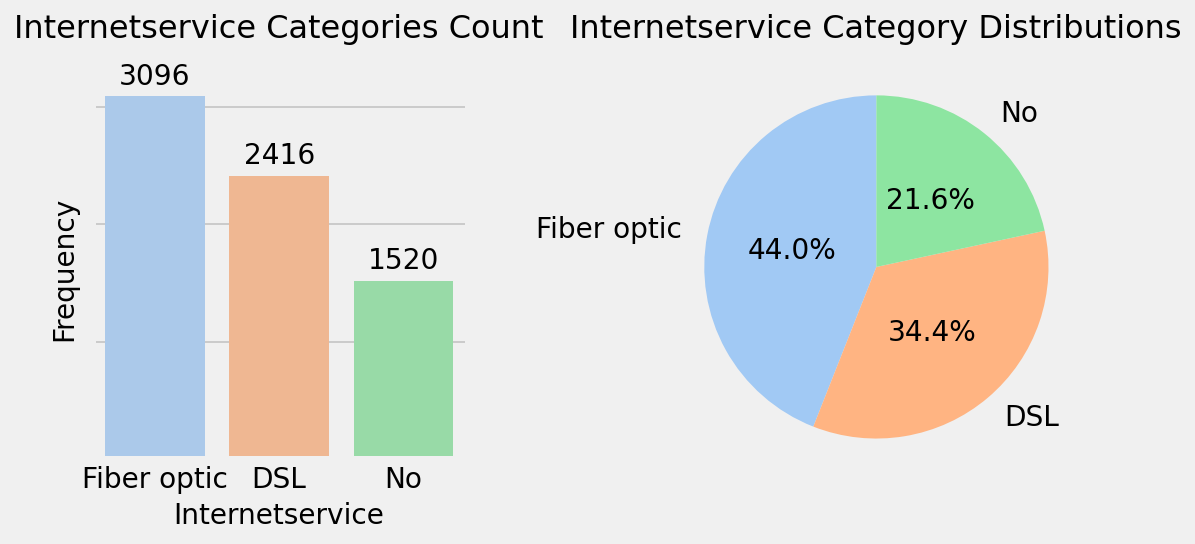

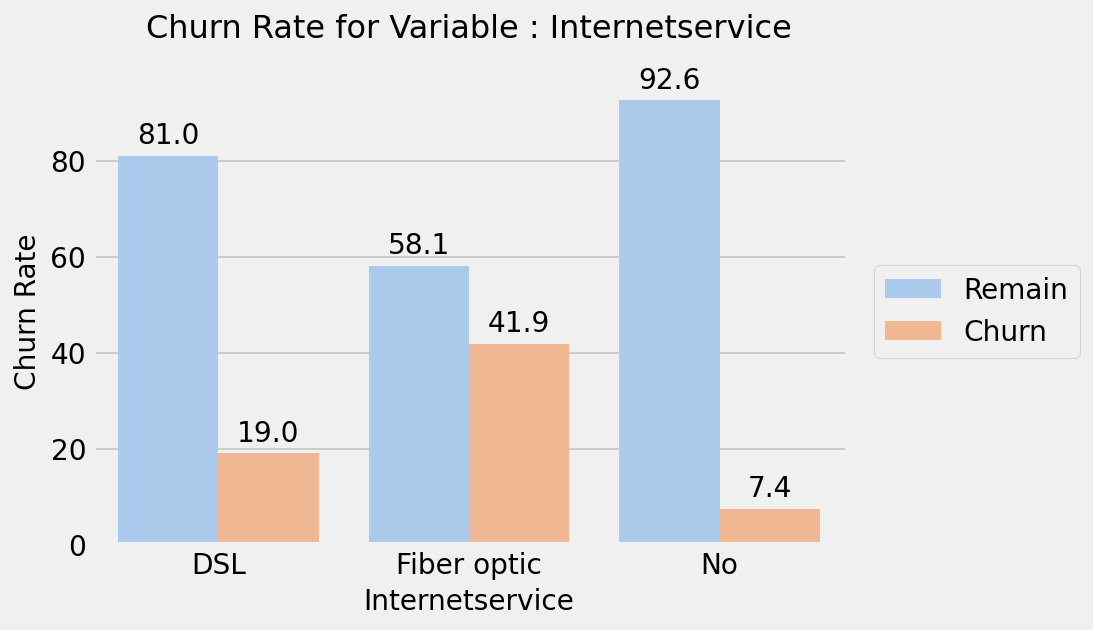

In [27]:
visualisation.count_pie_plots(df, 'InternetService')
visualisation.barplot_with_hue(df, 'InternetService', 'Churn', 'Churn Rate')

<Figure size 576x288 with 0 Axes>

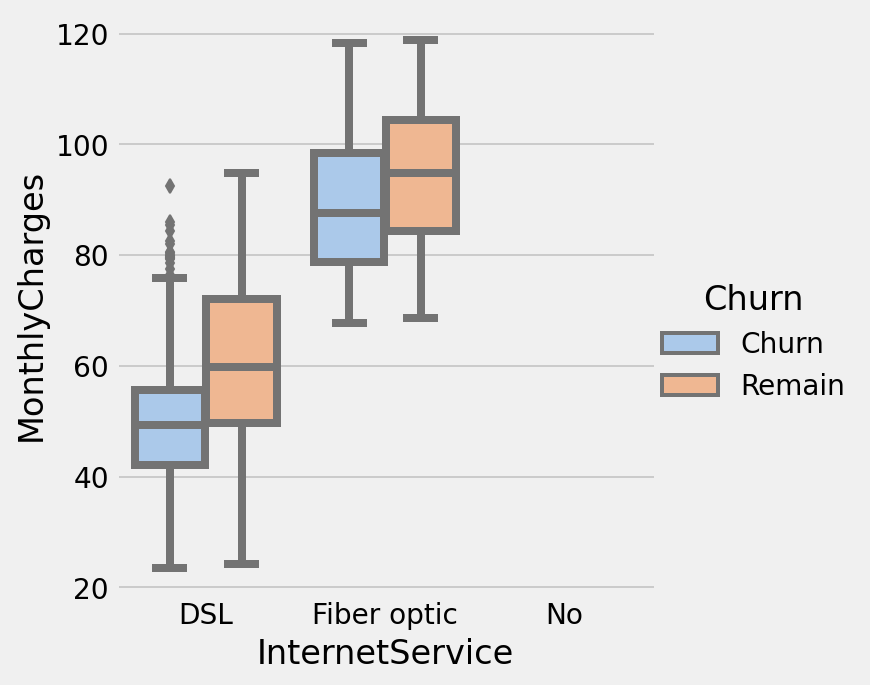

In [31]:
# Investigating difference in monthly charges --> Upgrade to plotly
fig = plt.figure(figsize=(8,4))
sns.catplot(x='InternetService', y='MonthlyCharges', hue='Churn', kind='box',
                 palette='pastel', data=df.loc[df.InternetService != 'No'])
sns.despine()
plt.show();

#### Variable : OnlineSecurity
Around half of the Telco's cutomers do no have an Online Security plan 

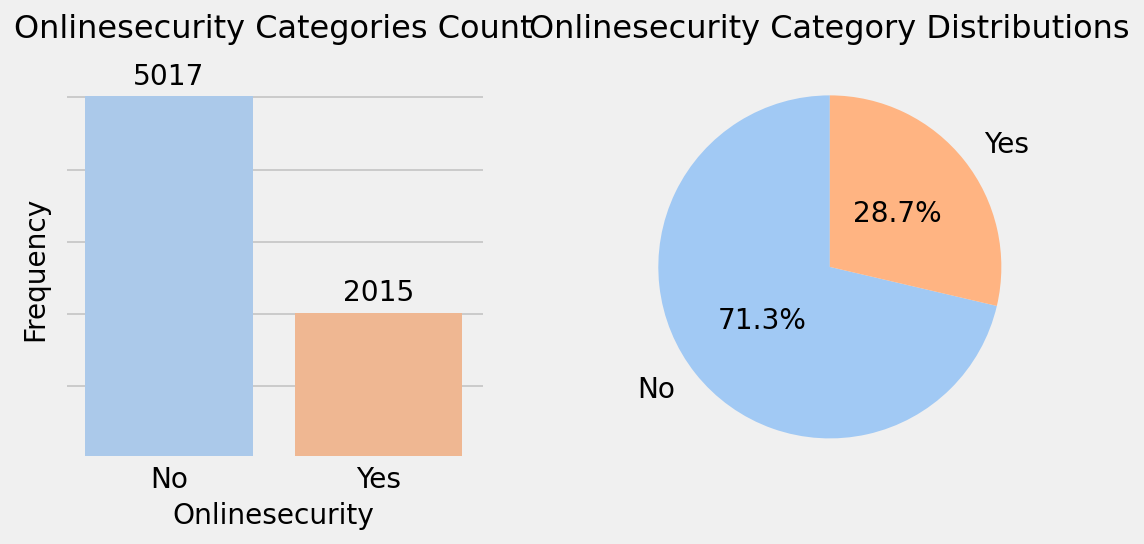

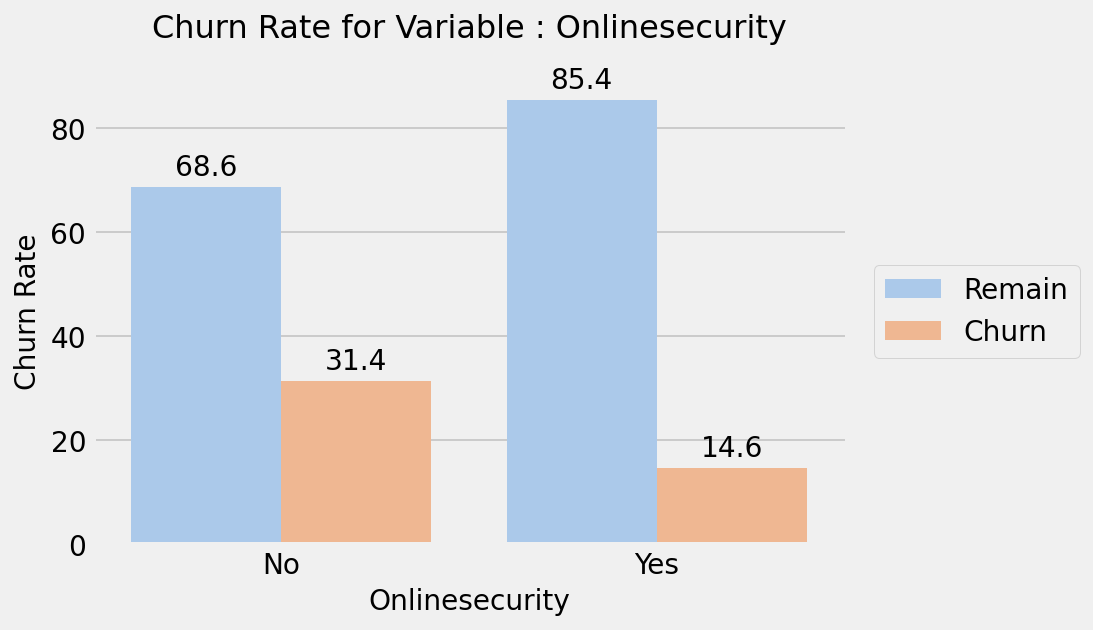

In [29]:
visualisation.count_pie_plots(df, 'OnlineSecurity')
visualisation.barplot_with_hue(df, 'OnlineSecurity', 'Churn', 'Churn Rate')

### Variable : OnlineBackup

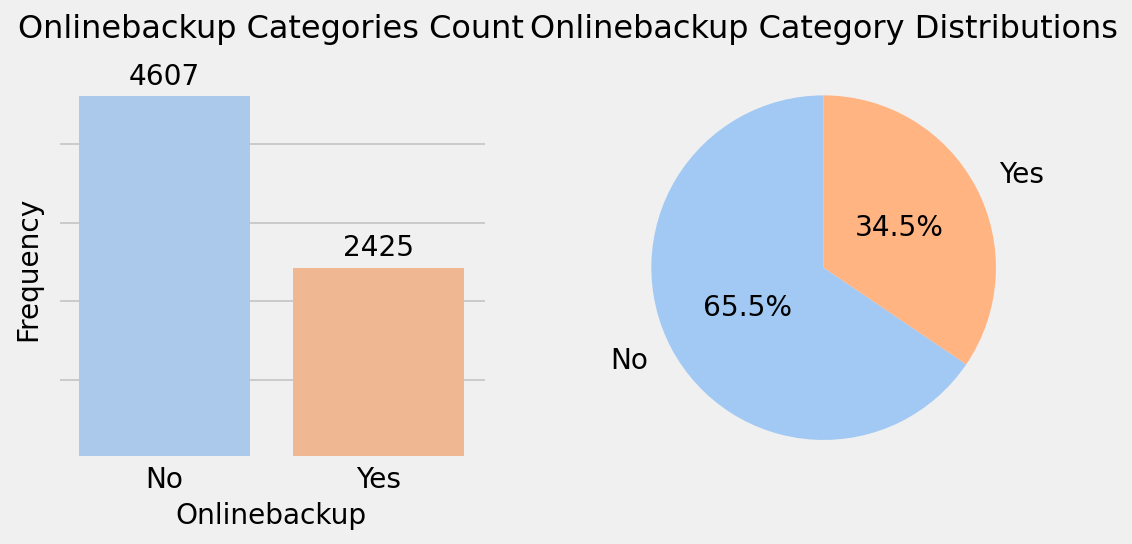

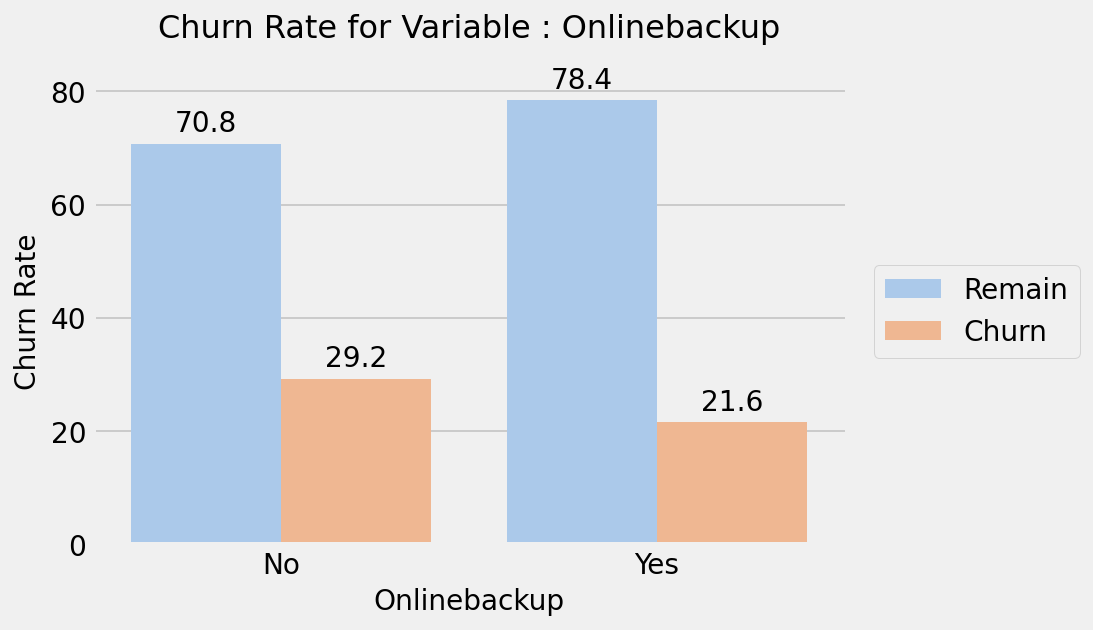

In [30]:
visualisation.count_pie_plots(df, 'OnlineBackup')
visualisation.barplot_with_hue(df, 'OnlineBackup', 'Churn', 'Churn Rate')